In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [57]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [58]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

In [70]:
df.shape

(34545, 358)

In [73]:
df.reset_index
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [74]:
# your code here
tri_state = [9,34,36]

Now check to see how large our subset df.

In [75]:
# your code here
df = df[df['_STATE'].isin(tri_state)]

df.groupby('_STATE').count()

,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
_STATE,,,,,,,,,,,,,,,,,,,,,
9.0,10588,10588,10588,10588,10588,10588,10588,10588,5528,5528,...,10588,10588,10588,10588,10588,10588,10588,3909,3909,9410
34.0,11708,11708,11708,11708,11708,11708,11708,11708,7529,7529,...,11708,11708,11708,11708,11708,11708,11708,4412,4412,10664
36.0,12249,12249,12249,12249,12249,12249,12249,12249,5445,5445,...,12249,12249,12249,12249,12249,12249,12249,3890,3890,10698


**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code. 

In [76]:
# refer to the data dictionary to learn that 77, 88, and 99 are actually categorical info

zero_dict = {88.0 : 0,
            77.0 : np.nan,
            99.0 : np.nan}
zero_dict.keys()

dict_keys([88.0, 77.0, 99.0])

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [92]:
#change all the '88's to '0's
# 77 : nan
# 99 : nan
df['PHYSHLTH'] = df['PHYSHLTH'].replace(zero_dict)


In [119]:
print(df['PHYSHLTH'].value_counts(dropna=False).shape)
df['PHYSHLTH'].unique().shape

(32,)


(32,)

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a gprah shows the histogram of the data.

In [141]:
# descriptive statistics
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

In [146]:
df['PHYSHLTH']

array([0., 0., 2., ..., 6., 0., 0.])

- add some labels! 

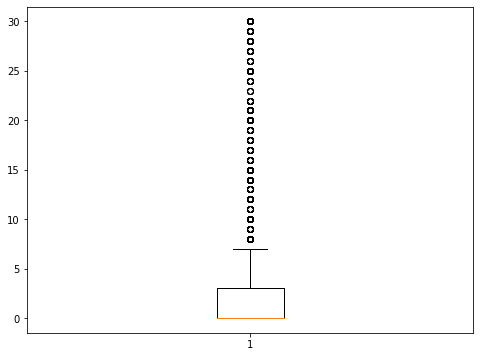

In [160]:
# graphic showing those descriptive stats
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
bp = ax.boxplot(df['PHYSHLTH'].dropna())

Text(0, 0.5, 'Frequency of Respondents')

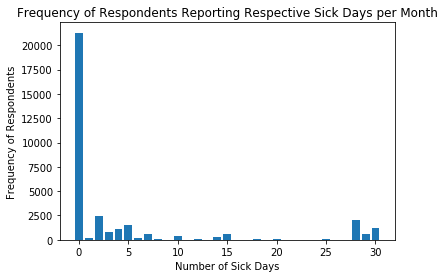

In [161]:
# graphic showing the distribution of data
# add some labels!
plt.bar(df['PHYSHLTH'].unique(),df['PHYSHLTH'].value_counts(dropna=False))

plt.title('Frequency of Respondents Reporting Respective Sick Days per Month')
plt.xlabel('Number of Sick Days')
plt.ylabel('Frequency of Respondents')

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [195]:
# code to calculate the average number of sick days by state
display(df[['PHYSHLTH','_STATE']].groupby('_STATE').mean())
df.groupby('_STATE').mean()['PHYSHLTH']

,PHYSHLTH
_STATE,
9.0,3.688562
34.0,4.380957
36.0,4.148030


_STATE
9.0     3.688562
34.0    4.380957
36.0    4.148030
Name: PHYSHLTH, dtype: float64

<BarContainer object of 3 artists>

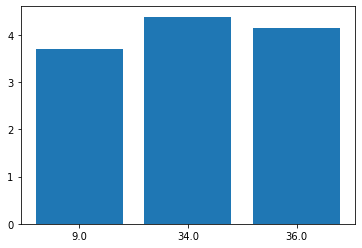

In [196]:
plt.bar(df['_STATE'].astype(str).unique(),df.groupby('_STATE').mean()['PHYSHLTH'])

-  change your x-values to state names, add labels

In [197]:
# code to graph those averages using matplotlib
# change your x-values to state names, add labels


## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.

- how would you define 'chronically sick'?



In [204]:
##### code to create new colum for chronically sick

df['chronically_sick']=df['PHYSHLTH']>15

df['chronically_sick']

df.groupby(['_STATE','chronically_sick']).sum()['PHYSHLTH']



_STATE  chronically_sick
9.0     False               13368.0
        True                25041.0
34.0    False               15316.0
        True                34881.0
36.0    False               17605.0
        True                31657.0
Name: PHYSHLTH, dtype: float64

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

- there are more values in the chronically sick column because there are some nan values in PHYSHLTH. Will this be a problem in analysis? I don't think so.

In [13]:
# Sean's answer ??



In [14]:
# code to calculate percentages per state


In [15]:
# create graphic to compare chronically sick by state


## 6. Independent Variables (categorical)

Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

## 7. Independent Variables (continuous):

Now let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

## 8. Additional variables: Choose two additional survey items you would like to investigate do steps  6 or 7 for those variables.

In [ ]:
# your code here

## 9. Based on your initial data exploration, what are some hypotheses of what affects a person's health that you would like to further investigate?

Type out your initial hyptotheses below:

1. 

2. 

3.  

## Bonus: Create some cool graphics.  